## Problem 2

In [1]:
%matplotlib inline

In [2]:
from nose.tools import assert_equal
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_almost_equal
import seaborn as sns

In [117]:
def plot_2_by_2(x, y, z):
    '''
    Creates a two-by-two plot of x on y, x on z, x on 
    y^2, and x on z^2.
    
    The format for the plot calls is (in terms of (xaxis, yaxis)):
    top left: x, y
    top right: x, z
    bottom left: x, y^2
    bottom right: x, z^2
    
    Parameters
    ----------
    x: A numpy array of data points for the x-axis.
    y: A numpy array of data points for the y-axis.
    z: A numpy array of data points for the other y-axis.
    
    Returns
    -------
    A 2x2 numpy array of matplotlib.axes._subplots.AxesSubplot objects
    '''
    
    sns.set_context("poster")
    sns.set_style("darkgrid")
    f, axarr = plt.subplots(2, 2,figsize=(12.0, 9.0))
    axarr[0, 0].plot(x, y)
    axarr[0, 0].set_title('x, y')
    axarr[0, 1].plot(x, z)
    axarr[0, 1].set_title('x, z')
    axarr[1, 0].plot(x, y ** 2)
    axarr[1, 0].set_title('x, y^2')
    axarr[1, 1].plot(x, z ** 2)
    axarr[1, 1].set_title('x, z^2')
    return axarr

In [153]:
# make data for the plotting
x_arr = np.linspace(0, 2 * np.pi, 400)
y_arr = np.sin(x_arr)
z_arr = np.cos(x_arr)

# get the axes array
axarr = plot_2_by_2(x_arr, y_arr, z_arr)

# make sure it's an array
assert_equal(type(axarr), np.ndarray, 
             msg='axis array should be a numpy array')

## x value tests
assert_array_almost_equal(axarr[0, 1].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for top right')
assert_array_almost_equal(axarr[1, 1].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for bottom right')
assert_array_almost_equal(axarr[0, 0].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for top left')
assert_array_almost_equal(axarr[1, 0].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for bottom left')
## y value tests
assert_array_almost_equal(axarr[0, 1].lines[0].get_data()[1], z_arr, 
                    err_msg='y values are not equivalent for top right')
assert_array_almost_equal(axarr[1, 1].lines[0].get_data()[1], z_arr**2, 
                    err_msg='x values are not equivalent for bottom right')
assert_array_almost_equal(axarr[0, 0].lines[0].get_data()[1], y_arr, 
                    err_msg='x values are not equivalent for top left')
assert_array_almost_equal(axarr[1, 0].lines[0].get_data()[1], y_arr**2, 
                    err_msg='x values are not equivalent for bottom left')

# height and width tests
assert_equal(axarr[0,0].get_figure().get_figwidth(), 12.0)
assert_equal(axarr[0,0].get_figure().get_figheight(), 9.0)
plt.close()

In [149]:
def plot_with_legend(lower = -3 , upper = 3):
    """
    Plots the sine and cosine functions with a legend.
    
    Parameters
    ----------
    lower: the lower bound of the x axis
    upper: the upper bound of the x axis
    
    Returns
    -------
    A matplotlib.Axes instance.
    """
    
    fig, ax = plt.subplots()
    x = np.arange(lower,upper,0.01)
    y1=np.sin(x)
    y2=np.cos(x)
    ax.plot(x, y1, color='blue',label='sine')
    ax.plot(x,y2,color='green',label='cosine')
    ax.set_xlabel("x in radians")
    ax.set_ylabel("y")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-4, 5, 1))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    ax.legend(loc='upper left')
    ax.set_title("Sine and Cosine values for x between -π and π")
    sns.set_context("poster")
    sns.set_style("darkgrid")
    return ax

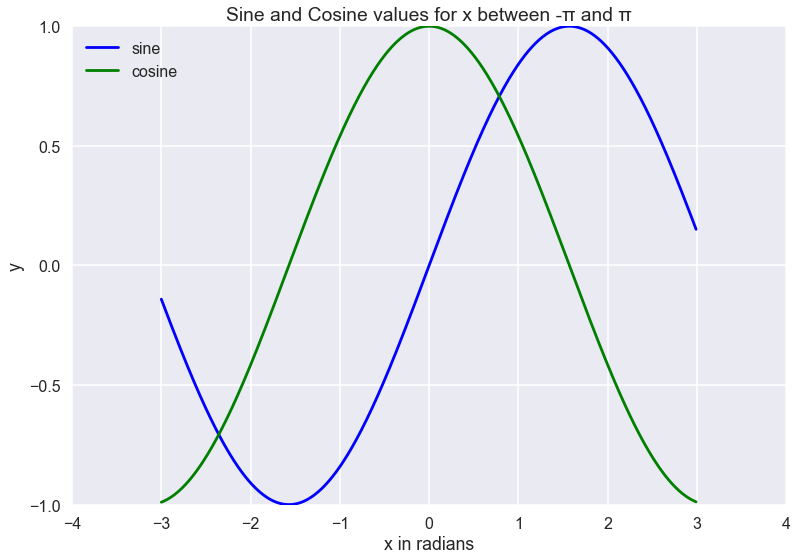

In [150]:
ax_2 = plot_with_legend()

In [152]:
# get the ax object
ax_2 = plot_with_legend(lower=-4, upper=4)
# make sure the legend is right
assert_equal(ax_2.legend().get_texts()[0].get_text(), 'sine')
assert_equal(ax_2.legend().get_texts()[1].get_text(), 'cosine')
# make sure the data for the sine plot is right
x, y1 = ax_2.lines[0].get_data()
assert_array_almost_equal(y1, np.sin(x))
# make sure the data for the cosine plot is right
x, y2 = ax_2.lines[1].get_data()
assert_array_almost_equal(y2, np.cos(x))
# make sure you set the bounds right
assert_array_almost_equal(4, max(x), decimal=1, err_msg='try decreasing step size in np.arange')
assert_array_almost_equal(-4, min(x), decimal=1, err_msg='try decreasing step size in np.arange')
plt.close()